In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# MRI brain tumor detection dataset

###### https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

# Import Packages

In [2]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import random
import cv2
import sys

## Reading the images

In [3]:
# for tumor
tumor = []
path = '/content/drive/MyDrive/brain_tumor_dataset/yes/*.jpg'
for f in glob.iglob(path):
  img = cv2.imread(f)
  img = cv2.resize(img, (128,128))
  b, g, r = cv2.split(img)
  img = cv2.merge([r, g, b])
  tumor.append(img)

In [4]:
len(tumor)

86

In [5]:
for img in tumor:
  print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [6]:
# for healthy
healthy = []
path = '/content/drive/MyDrive/brain_tumor_dataset/no/*.jpg'
for f in glob.iglob(path):
  img = cv2.imread(f)
  img = cv2.resize(img, (128,128))
  b, g, r = cv2.split(img)
  img = cv2.merge([r, g, b])
  healthy.append(img)

In [7]:
len(healthy)

85

In [8]:
for img in healthy:
  print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [9]:
tumor = np.array(tumor)
healthy = np.array(healthy)

In [10]:
print(tumor.shape)
print(healthy.shape)

(86, 128, 128, 3)
(85, 128, 128, 3)


In [11]:
tumor.shape[0]

86

In [12]:
All = np.concatenate((healthy, tumor))

In [13]:
#select 5 random value from 0-9, (replace) not repeated
np.random.choice(10, 5, replace=False)

array([5, 4, 2, 0, 6])

# Visualizing Brain MRI Images

In [14]:
def plot_random(healthy, tumor, num=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], num, replace=False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(num):
      plt.subplot(1, num, i+1)
      plt.title('healthy')
      plt.imshow(healthy_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
      plt.subplot(1, num, i+1)
      plt.title('tumor')
      plt.imshow(tumor_imgs[i])




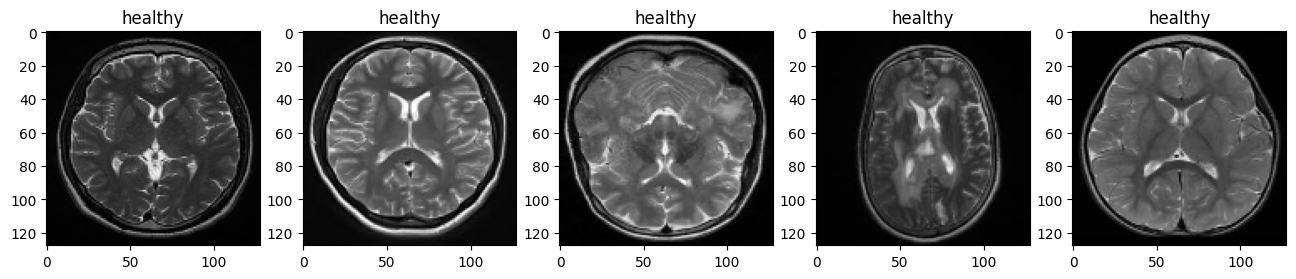

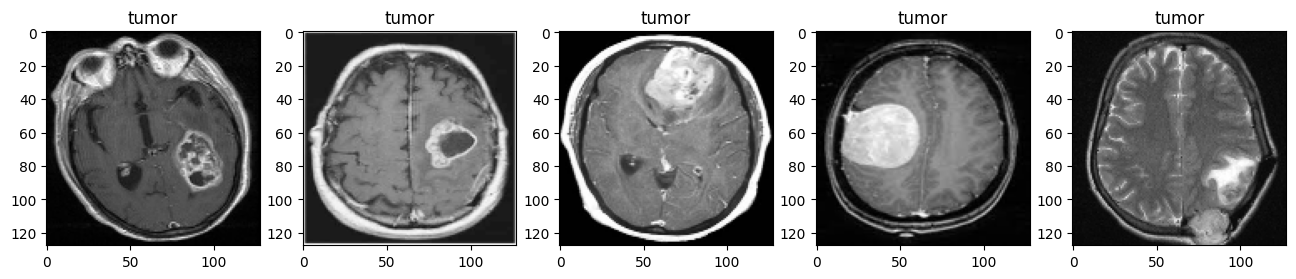

In [15]:
plot_random(healthy, tumor, num=5)

## Create Torch Dataset Class

### What is Pytorch's Abstract Dataset Class

In [16]:
class Dataset(object):
    """An abstract class representing a Dataset.

    All other datasets should subclass it. All subclasses should override
    ``__len__``, that provides the size of the dataset, and ``__getitem__``,
    supporting integer indexing in range from 0 to len(self) exclusive.
    """

    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])

In [ ]:
# class MRI(Dataset):
#   def __init__(self, scores):
#     self.x = scores
#   def __getitem__(self, index):
#     return self.x[index]
#   def __len__(self):
#     return len(self.x)


# s = [1, 2, 3, 4]
# d = MRI(s)

# print(d[1])
# print(len(d))

# Creating MRI cutom dataset class

In [ ]:
# class MRI(Dataset):
#   def __init__(self, images, labels):           #if you have separate train, test set
#      self.images = images
#      self.labels = labels

In [17]:
class MRI(Dataset):
  def __init__(self):
    tumor = []
    healthy = []
    # cv2 - It reads in BGR format by default
    for f in glob.iglob("/content/drive/MyDrive/brain_tumor_dataset/yes/*.jpg"):
      img = cv2.imread(f)
      img = cv2.resize(img,(128,128)) # I can add this later in the boot-camp for more adventure
      b, g, r = cv2.split(img)
      img = cv2.merge([r,g,b])
      img = img.reshape((img.shape[2],img.shape[0],img.shape[1])) # otherwise the shape will be (h,w,#channels)
      tumor.append(img)

    for f in glob.iglob("/content/drive/MyDrive/brain_tumor_dataset/no/*.jpg"):
      img = cv2.imread(f)
      img = cv2.resize(img,(128,128))
      b, g, r = cv2.split(img)
      img = cv2.merge([r,g,b])
      img = img.reshape((img.shape[2],img.shape[0],img.shape[1]))
      healthy.append(img)


    # our images
    tumor = np.array(tumor,dtype=np.float32)
    healthy = np.array(healthy,dtype=np.float32)

    # our labels
    tumor_label = np.ones(tumor.shape[0], dtype=np.float32)
    healthy_label = np.zeros(healthy.shape[0], dtype=np.float32)

    # Concatenates
    self.images = np.concatenate((tumor, healthy), axis=0)
    self.labels = np.concatenate((tumor_label, healthy_label))



  def __len__(self):
    return self.images.shape[0]

  def __getitem__(self, index):
    sample = {'image': self.images[index], 'label': self.labels[index]}
    return sample

  def normalize(self):
    self.images = self.images/255.0

In [ ]:
# mri = MRI()

In [18]:
# len(mri)

In [ ]:
# mri[5]

In [ ]:
# img = mri[5]['image']

In [ ]:
# img.shape

In [ ]:
# print(np.min(img))
# print(np.max(img))

In [19]:
mri_dataset = MRI()
mri_dataset.normalize()

# Creating a dataloader

### The world without **dataloader**

In [ ]:
# index = list(range(len(mri)))
# random.shuffle(index)
# for idx in index:
#   sample = mri[idx]
#   img = sample['image']
#   print(img.shape)
#   img = img.reshape(img.shape[1], img.shape[2], img.shape[0])
#   print(img.shape)
#   sys.exit()    #by commenting this line you will print all img
#   plt.imshow(img)
#   plt.show()

### The world with **dataloader**

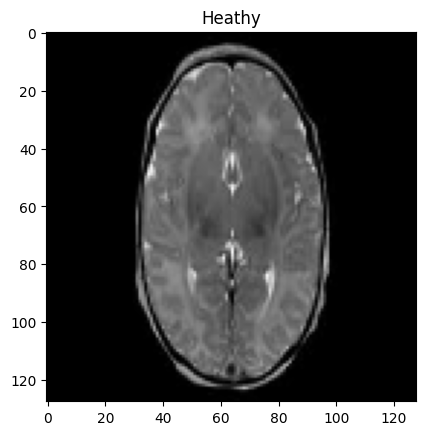

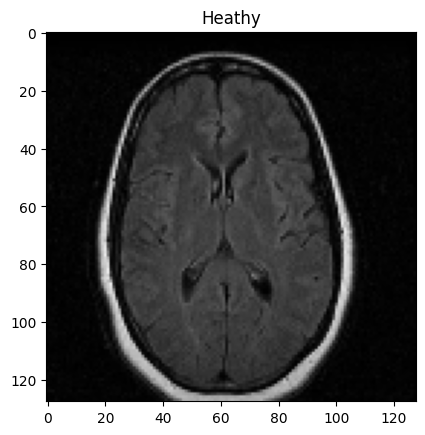

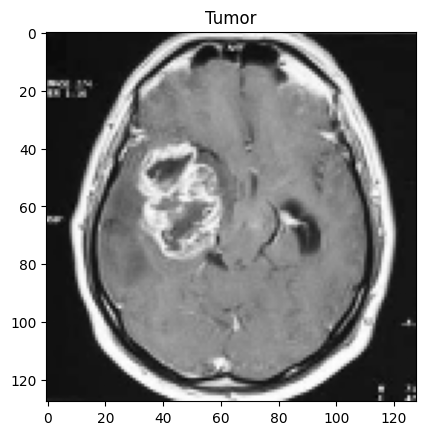

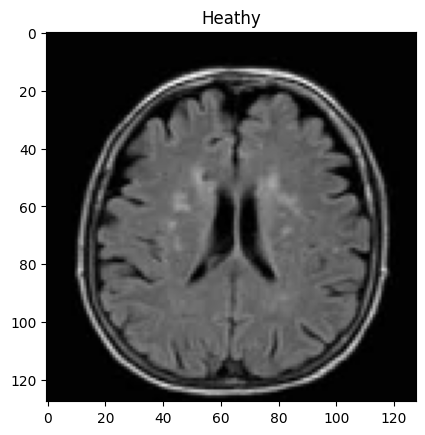

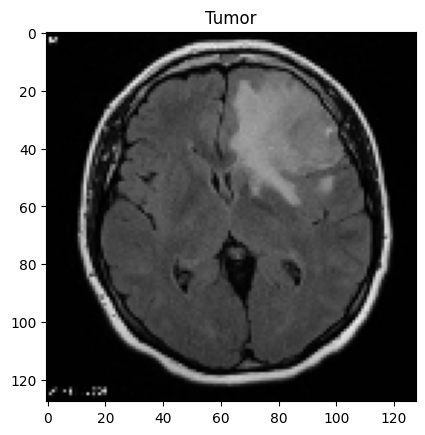

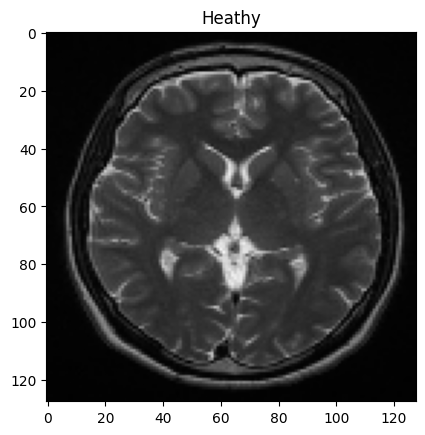

In [20]:
# One way of iterating
names={0:'Heathy', 1:'Tumor'}
dataloader = DataLoader(mri_dataset, shuffle=True)
for i, sample in enumerate(dataloader):
    img = sample['image'].squeeze()
    img = img.reshape((img.shape[1], img.shape[2], img.shape[0]))
    plt.title(names[sample['label'].item()])
    plt.imshow(img)
    plt.show()
    if i == 5:
        break

# Create a Model

In [21]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5),
        nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2, stride=5)
    )

    self.fc_model = nn.Sequential(
        nn.Linear(in_features=256, out_features=120),
        nn.Tanh(),
        nn.Linear(in_features=120, out_features=84),
        nn.Tanh(),
        nn.Linear(in_features=84, out_features=1)
    )
  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    x = F.sigmoid(x)

    return x

In [22]:
model = CNN()

In [23]:
model

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [24]:
model.cnn_model

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): Tanh()
  (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): Tanh()
  (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
)

In [25]:
model.cnn_model[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))

In [26]:
model.cnn_model[0].weight

Parameter containing:
tensor([[[[ 9.6944e-02,  1.5768e-03, -9.5143e-02,  9.9337e-02, -3.6646e-02],
          [-9.8185e-02, -4.7667e-02, -1.0762e-01,  7.5273e-02, -1.1413e-01],
          [-9.6500e-02,  1.2406e-03,  1.0859e-01,  9.1617e-02, -1.1366e-01],
          [ 1.6852e-03, -9.9094e-02,  1.4416e-02, -3.5833e-02, -6.2963e-02],
          [-5.5911e-02,  4.1023e-02, -1.1239e-01,  9.7632e-02,  6.2382e-02]],

         [[ 9.9112e-02,  3.5786e-02,  3.8298e-02,  5.9988e-02,  5.5231e-03],
          [-2.1537e-02, -6.1293e-02, -8.9507e-02, -5.5478e-02,  7.3871e-02],
          [ 7.7625e-02,  4.7652e-02, -4.7279e-02,  4.9865e-02, -9.3740e-03],
          [-5.4990e-02, -4.8826e-02,  1.1472e-01,  5.7580e-02, -1.0306e-01],
          [ 3.7272e-02, -8.9726e-03,  1.0195e-01, -8.2591e-02, -1.2658e-03]],

         [[ 6.3992e-02,  7.0649e-02,  6.4901e-02,  7.0026e-02,  7.9677e-02],
          [-4.9063e-02,  1.0114e-01,  1.6681e-02, -1.7339e-02, -8.9767e-02],
          [-9.6147e-02,  5.4636e-02,  2.9324e-02, 

In [27]:
model.cnn_model[0].weight.shape          # 6 filters each of them (5x5), and each of them have 3 channels

torch.Size([6, 3, 5, 5])

In [28]:
model.cnn_model[0].weight[0].shape       # first filter

torch.Size([3, 5, 5])

In [29]:
model.cnn_model[0].weight[0][0]          # first filter first channel

tensor([[ 0.0969,  0.0016, -0.0951,  0.0993, -0.0366],
        [-0.0982, -0.0477, -0.1076,  0.0753, -0.1141],
        [-0.0965,  0.0012,  0.1086,  0.0916, -0.1137],
        [ 0.0017, -0.0991,  0.0144, -0.0358, -0.0630],
        [-0.0559,  0.0410, -0.1124,  0.0976,  0.0624]],
       grad_fn=<SelectBackward0>)

### Linear layer

In [30]:
model.fc_model[0].weight.shape

torch.Size([120, 256])

In [31]:
# device will be 'cuda' if a GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# creating a CPU tensor
cpu_tensor = torch.rand(10).to(device)
# moving same tensor to GPU
gpu_tensor = cpu_tensor.to(device)

print(cpu_tensor, cpu_tensor.dtype, type(cpu_tensor), cpu_tensor.type())
print(gpu_tensor, gpu_tensor.dtype, type(gpu_tensor), gpu_tensor.type())

print(cpu_tensor*gpu_tensor)

tensor([0.8127, 0.1176, 0.1135, 0.3330, 0.3349, 0.5753, 0.1360, 0.1550, 0.5741,
        0.1951]) torch.float32 <class 'torch.Tensor'> torch.FloatTensor
tensor([0.8127, 0.1176, 0.1135, 0.3330, 0.3349, 0.5753, 0.1360, 0.1550, 0.5741,
        0.1951]) torch.float32 <class 'torch.Tensor'> torch.FloatTensor
tensor([0.6605, 0.0138, 0.0129, 0.1109, 0.1122, 0.3309, 0.0185, 0.0240, 0.3296,
        0.0381])


# Evaluate a New-Born Neural Network!

In [32]:
mri_dataset = MRI()
mri_dataset.normalize()
device = torch.device('cpu')
model = CNN().to(device)

In [33]:
device

device(type='cpu')

In [34]:
dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=False)

In [35]:
model.eval()
outputs = []
y_true = []
with torch.no_grad():
    for D in dataloader:
        image = D['image'].to(device)
        label = D['label'].to(device)

        y_hat = model(image)

        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())


In [36]:
outputs = np.concatenate( outputs, axis=0 ).squeeze()
y_true = np.concatenate( y_true, axis=0 ).squeeze()

In [37]:
def threshold(scores,threshold=0.50, minimum=0, maximum = 1.0):
    x = np.array(list(scores))
    x[x >= threshold] = maximum
    x[x < threshold] = minimum
    return x

In [38]:
accuracy_score(y_true, threshold(outputs))

0.49707602339181284

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'Healthy')]

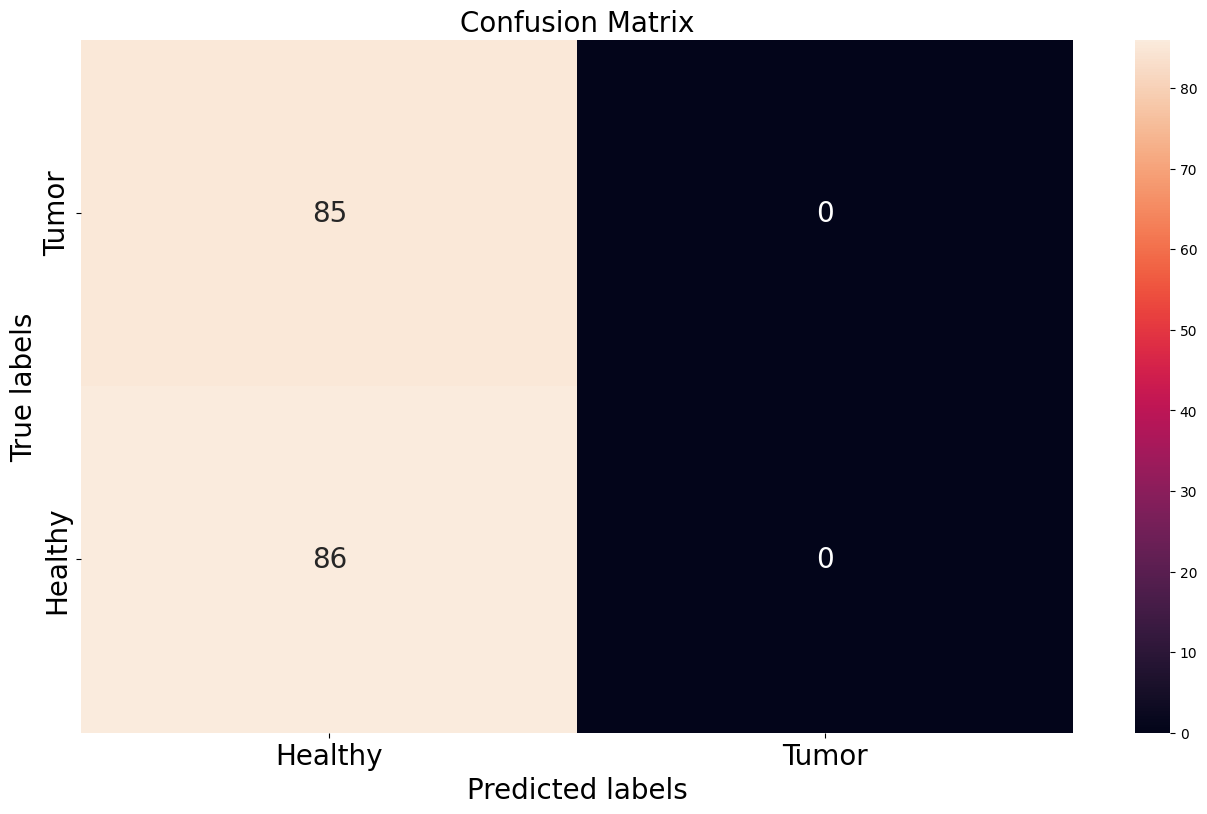

In [39]:
# a better confusion matrix
import seaborn as sns

plt.figure(figsize=(16,9))
cm = confusion_matrix(y_true, threshold(outputs))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size": 20})

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['Healthy','Tumor'], fontsize=20)
ax.yaxis.set_ticklabels(['Tumor','Healthy'], fontsize=20)

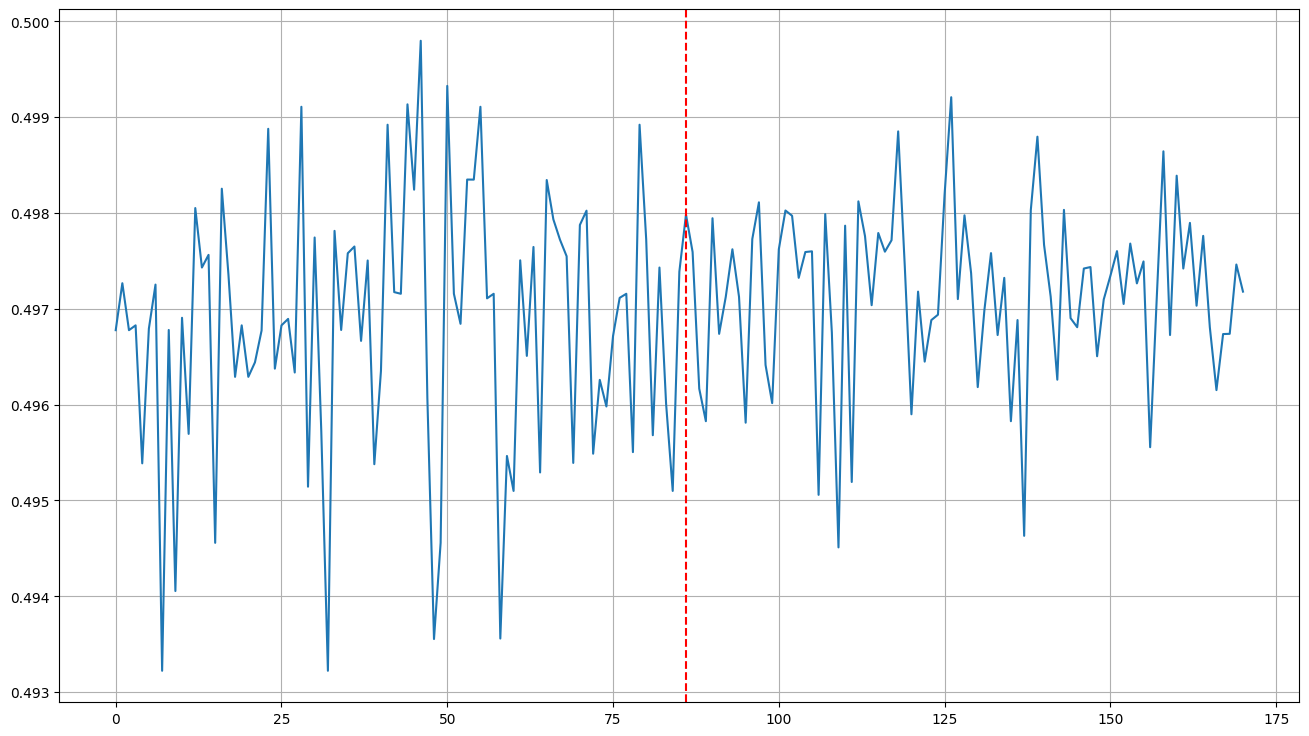

In [40]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumor), color='r', linestyle='--')
plt.grid()

# Train the dumb model

In [41]:
eta = 0.0001
EPOCH = 400
optimizer = torch.optim.Adam(model.parameters(), lr=eta)
dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=True)
model.train()

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [42]:
for epoch in range(1, EPOCH):
    losses = []
    for D in dataloader:
        optimizer.zero_grad()
        data = D['image'].to(device)
        label = D['label'].to(device)
        y_hat = model(data)
        # define loss function
        error = nn.BCELoss()
        loss = torch.sum(error(y_hat.squeeze(), label))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print('Train Epoch: {}\tLoss: {:.6f}'.format(epoch+1, np.mean(losses)))

Train Epoch: 10	Loss: 0.675825
Train Epoch: 20	Loss: 0.640432
Train Epoch: 30	Loss: 0.604571
Train Epoch: 40	Loss: 0.569067
Train Epoch: 50	Loss: 0.539258
Train Epoch: 60	Loss: 0.489630
Train Epoch: 70	Loss: 0.487100
Train Epoch: 80	Loss: 0.406725
Train Epoch: 90	Loss: 0.406084
Train Epoch: 100	Loss: 0.367503
Train Epoch: 110	Loss: 0.384990
Train Epoch: 120	Loss: 0.327569
Train Epoch: 130	Loss: 0.327766
Train Epoch: 140	Loss: 0.295223
Train Epoch: 150	Loss: 0.294104
Train Epoch: 160	Loss: 0.257308
Train Epoch: 170	Loss: 0.271979
Train Epoch: 180	Loss: 0.206742
Train Epoch: 190	Loss: 0.190615
Train Epoch: 200	Loss: 0.157847
Train Epoch: 210	Loss: 0.167187
Train Epoch: 220	Loss: 0.121771
Train Epoch: 230	Loss: 0.110921
Train Epoch: 240	Loss: 0.092076
Train Epoch: 250	Loss: 0.081316
Train Epoch: 260	Loss: 0.068994
Train Epoch: 270	Loss: 0.049972
Train Epoch: 280	Loss: 0.050613
Train Epoch: 290	Loss: 0.036162
Train Epoch: 300	Loss: 0.034024
Train Epoch: 310	Loss: 0.025761
Train Epoch: 320	

### Evaluate the smart model

In [44]:
model.eval()
dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=False)
outputs=[]
y_true = []
with torch.no_grad():
    for D in dataloader:
        image =  D['image'].to(device)
        label = D['label'].to(device)

        y_hat = model(image)

        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())

outputs = np.concatenate( outputs, axis=0 )
y_true = np.concatenate( y_true, axis=0 )

In [45]:
accuracy_score(y_true, threshold(outputs))

1.0

[Text(0, 0.5, 'Tumor'), Text(0, 1.5, 'Healthy')]

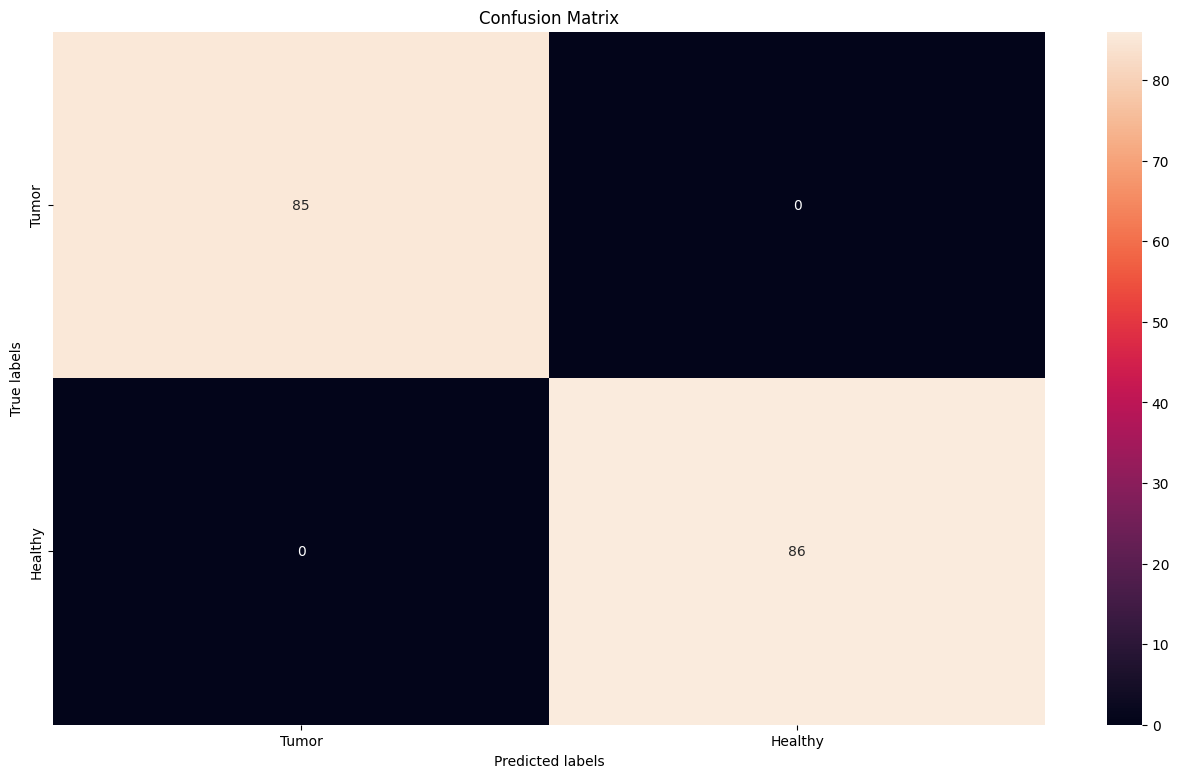

In [46]:
cm = confusion_matrix(y_true, threshold(outputs))
plt.figure(figsize=(16,9))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Tumor','Healthy'])
ax.yaxis.set_ticklabels(['Tumor','Healthy'])

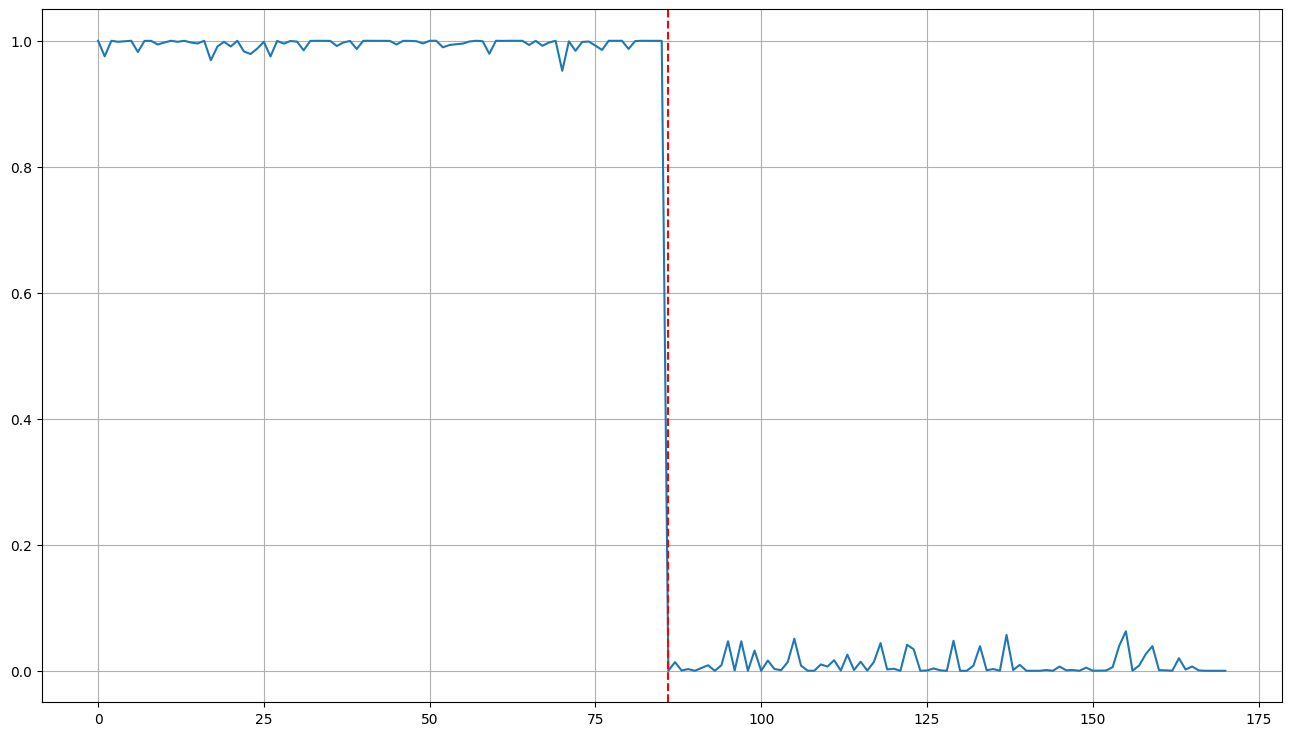

In [47]:
plt.figure(figsize=(16,9))
plt.plot(outputs)
plt.axvline(x=len(tumor), color='r', linestyle='--')
plt.grid()

# Visualising the Feature Maps of the Convolutional Filters


In [48]:
model


CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [49]:
no_of_layers = 0
conv_layers = []

In [50]:
model_children = list(model.children())
model_children

[Sequential(
   (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
   (1): Tanh()
   (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
   (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
   (4): Tanh()
   (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
 ),
 Sequential(
   (0): Linear(in_features=256, out_features=120, bias=True)
   (1): Tanh()
   (2): Linear(in_features=120, out_features=84, bias=True)
   (3): Tanh()
   (4): Linear(in_features=84, out_features=1, bias=True)
 )]

In [51]:
for child in model_children:
    if type(child) == nn.Sequential:
        for layer in child.children():
            if type(layer) == nn.Conv2d:
                no_of_layers += 1
                conv_layers.append(layer)

In [52]:
conv_layers

[Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1)),
 Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))]

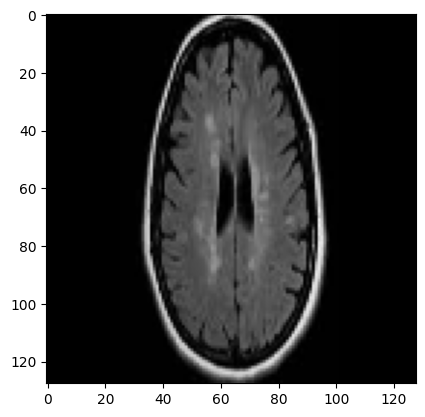

In [53]:
img = mri_dataset[100]['image']
plt.imshow(img.reshape(128,128,3))

In [54]:
img = torch.from_numpy(img).to(device)

In [55]:
img.shape

torch.Size([3, 128, 128])

In [56]:
img = img.unsqueeze(0)
img.shape

torch.Size([1, 3, 128, 128])

In [57]:
results = [conv_layers[0](img)]
for i in range(1, len(conv_layers)):
    results.append(conv_layers[i](results[-1]))
outputs = results

In [58]:
len(outputs)

2

In [59]:
outputs[0].shape

torch.Size([1, 6, 124, 124])

In [61]:
outputs[1].shape

torch.Size([1, 16, 120, 120])

In [86]:
for num_layer in range(len(outputs)):
    plt.figure(figsize=(50, 10))
    layer_viz = outputs[num_layer].squeeze()
    print("Layer ",num_layer+1)
    for i, f in enumerate(layer_viz):
        plt.subplot(2, 8, i + 1)
        plt.imshow(f.detach().cpu().numpy())
        plt.axis("off")
    plt.show()
    plt.close()

Output hidden; open in https://colab.research.google.com to view.

# Preparing a validation set: We need to change the MRI dataset slightly

In [78]:
# Import train/test split function from sklearn
from sklearn.model_selection import train_test_split

In [83]:
class MRI(Dataset):

    def __init__(self):

        # Variables to hold the Training data and Validation data
        self.X_train, self.y_train, self.X_val, self.y_val = None, None, None, None

        # A variable to determine if we are interested in retrieving the training OR the validation data
        self.mode = 'train'

        tumor = []
        healthy = []
        # cv2 - It reads in BGR format by default
        for f in glob.iglob("./data/brain_tumor_dataset/yes/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128)) # I can add this later in the boot-camp for more adventure
            b, g, r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2],img.shape[0],img.shape[1])) # otherwise the shape will be (h,w,#channels)
            tumor.append(img)

        for f in glob.iglob("./data/brain_tumor_dataset/no/*.jpg"):
            img = cv2.imread(f)
            img = cv2.resize(img,(128,128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r,g,b])
            img = img.reshape((img.shape[2],img.shape[0],img.shape[1]))
            healthy.append(img)

        # our images
        tumor = np.array(tumor,dtype=np.float32)
        healthy = np.array(healthy,dtype=np.float32)

        # our labels
        tumor_label = np.ones(tumor.shape[0], dtype=np.float32)
        healthy_label = np.zeros(healthy.shape[0], dtype=np.float32)

        # Concatenates
        self.images = np.concatenate((tumor, healthy), axis=0)
        self.labels = np.concatenate((tumor_label, healthy_label))

    # Define a function that would separate the data into Training and Validation sets
    def train_val_split(self):
        self.X_train, self.X_val, self.y_train, self.y_val = \
        train_test_split(self.images, self.labels, test_size=0.20, random_state=42)

    def __len__(self):
        # Use self.mode to deetrmine whether train or val data is of interest
        if self.mode == 'train':
            return self.X_train.shape[0]
        elif self.mode == 'val':
            return self.X_val.shape[0]

    def __getitem__(self, idx):
        # Use self.mode to deetrmine whether train or val data is of interest
        if self.mode== 'train':
            sample = {'image': self.X_train[idx], 'label': self.y_train[idx]}

        elif self.mode== 'val':
            sample = {'image': self.X_val[idx], 'label': self.y_val[idx]}

        return sample

    def normalize(self):
        self.images = self.images/255.0

### overfitting or not

In [84]:
mri_dataset = MRI()
mri_dataset.normalize()


In [85]:
mri_dataset.train_val_split()

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [82]:
train_dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=False)

AttributeError: 'NoneType' object has no attribute 'shape'